<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Advertisement.csv to Advertisement.csv


In [0]:
# Importing the Dataset
data = pd.read_csv("Advertisement.csv")

In [0]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0   Base_Sales  ...  TV_Radio_Sales1_Adstock  TV_Radio_Sales2_Adstock
0             0   999.420481  ...             0.000000e+00                      0.0
1             1  1016.029389  ...             0.000000e+00                      0.0
2             2  1020.880747  ...             0.000000e+00                      0.0
3             3  1020.230930  ...             0.000000e+00                      0.0
4             4  1031.258145  ...             0.000000e+00                      0.0
..          ...          ...  ...                      ...                      ...
255         255  1182.811882  ...             1.760000e-06                      0.0
256         256  1191.700526  ...             5.270000e-07                      0.0
257         257  1187.976077  ...             1.580000e-07                      0.0
258         258  1196.694780  ...             4.750000e-08                      0.0
259         259  1211.215776  ...         

In [0]:
data.head()

,Unnamed: 0,Base_Sales,TV_Sales1,Temprature,TV_Spend,Week,TV_Sales1_AdStock,TV_Sales2,TV_Radio_Sales1,TV_Radio_Sales2,Radio_Spend,TV_Sales2_Adstock,TV_Radio_Sales1_Adstock,TV_Radio_Sales2_Adstock
0,0,999.420481,999.420481,1.204759,0,1,0.0,1003.276688,1008.322089,1007.485460,0,0.0,0.0,0.0
1,1,1016.029389,1016.029389,2.391967,0,2,0.0,1008.322283,1004.325565,1005.948293,0,0.0,0.0,0.0
2,2,1020.880747,1020.880747,3.544331,0,3,0.0,1011.757184,1019.312032,1018.708342,0,0.0,0.0,0.0
3,3,1020.230930,1020.230930,4.645062,0,4,0.0,1020.124702,1023.269288,1016.475639,0,0.0,0.0,0.0
4,4,1031.258145,1031.258145,5.678127,0,5,0.0,1038.014845,1030.450885,1021.601069,0,0.0,0.0,0.0


In [0]:
# Removing the Unnamed Column
data_clean = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data_clean.head()

,Base_Sales,TV_Sales1,Temprature,TV_Spend,Week,TV_Sales1_AdStock,TV_Sales2,TV_Radio_Sales1,TV_Radio_Sales2,Radio_Spend,TV_Sales2_Adstock,TV_Radio_Sales1_Adstock,TV_Radio_Sales2_Adstock
0,999.420481,999.420481,1.204759,0,1,0.0,1003.276688,1008.322089,1007.485460,0,0.0,0.0,0.0
1,1016.029389,1016.029389,2.391967,0,2,0.0,1008.322283,1004.325565,1005.948293,0,0.0,0.0,0.0
2,1020.880747,1020.880747,3.544331,0,3,0.0,1011.757184,1019.312032,1018.708342,0,0.0,0.0,0.0
3,1020.230930,1020.230930,4.645062,0,4,0.0,1020.124702,1023.269288,1016.475639,0,0.0,0.0,0.0
4,1031.258145,1031.258145,5.678127,0,5,0.0,1038.014845,1030.450885,1021.601069,0,0.0,0.0,0.0


In [0]:
# Data Description
data_clean.describe()

,Base_Sales,TV_Sales1,Temprature,TV_Spend,Week,TV_Sales1_AdStock,TV_Sales2,TV_Radio_Sales1,TV_Radio_Sales2,Radio_Spend,TV_Sales2_Adstock,TV_Radio_Sales1_Adstock,TV_Radio_Sales2_Adstock
count,260.000000,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000
mean,1103.183169,1107.645536,-0.000266,22.384615,130.500000,1.487456e-01,1107.220512,1109.365433,1108.083439,6.923077,0.123619,1.487456e-01,0.123619
std,61.771037,63.228362,7.086496,65.710302,75.199734,3.391669e-01,63.501734,63.489458,63.230583,24.188646,0.286756,3.391669e-01,0.286756
min,989.349865,989.349869,-9.999971,0.000000,1.000000,0.000000e+00,984.779929,985.485778,984.240540,0.000000,0.000000,0.000000e+00,0.000000
25%,1050.225179,1052.074632,-6.906760,0.000000,65.750000,1.438750e-15,1051.194122,1054.641713,1051.728120,0.000000,0.000000,1.438750e-15,0.000000
50%,1104.208308,1112.066538,-0.007963,0.000000,130.500000,4.770000e-08,1110.965899,1114.084764,1113.075830,0.000000,0.000000,4.770000e-08,0.000000
75%,1155.743736,1162.311119,6.900619,0.000000,195.250000,5.686842e-03,1163.799559,1165.555626,1162.206357,0.000000,0.000000,5.686842e-03,0.000000
max,1222.175074,1242.885508,9.999997,500.000000,260.000000,1.235918e+00,1236.656651,1241.497501,1238.202603,100.000000,0.993262,1.235918e+00,0.993262


**Univariate Analysis of Adstocks**

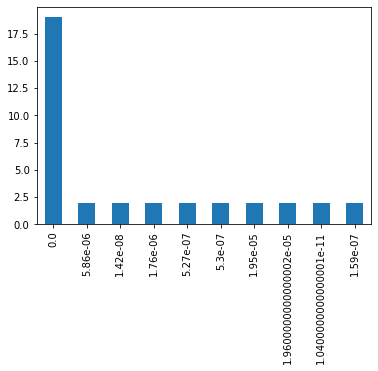

In [0]:
data['TV_Sales1_AdStock'].value_counts().head(10).plot.bar()


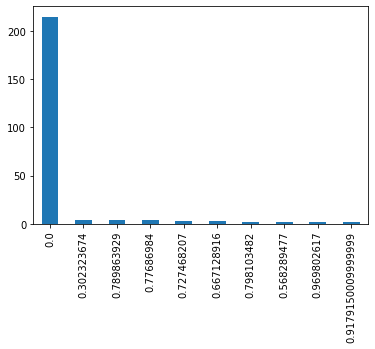

In [0]:
data['TV_Sales2_Adstock'].value_counts().head(10).plot.bar()

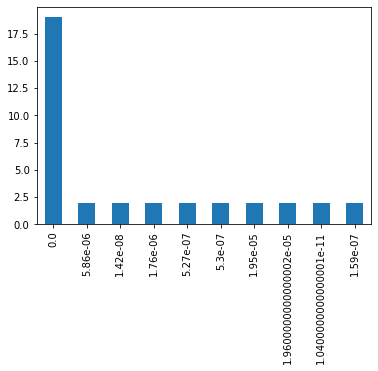

In [0]:
data['TV_Radio_Sales1_Adstock'].value_counts().head(10).plot.bar()

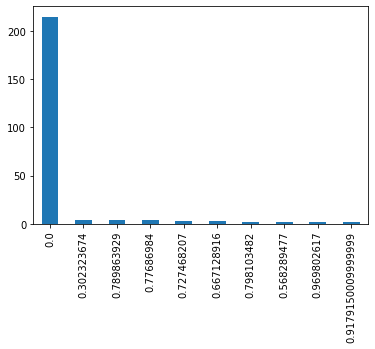

In [0]:
data['TV_Radio_Sales2_Adstock'].value_counts().head(10).plot.bar()

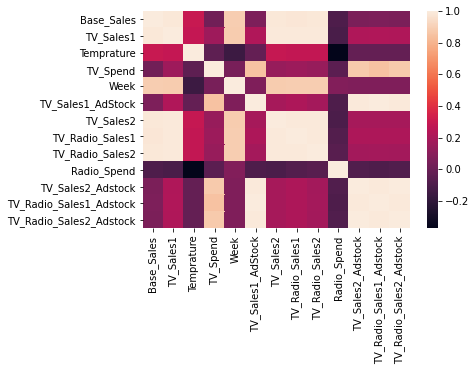

In [0]:
#Correlation b/w variables
corr = data_clean.corr()
sns.heatmap(corr)


In [0]:
#Labels and features
labels = data_clean['Base_Sales']
features = data_clean.drop(['Base_Sales'], axis=1)

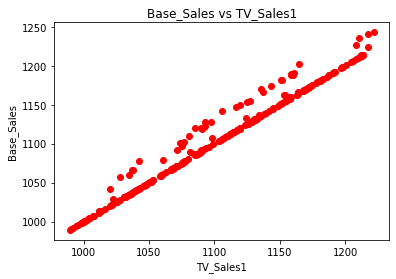

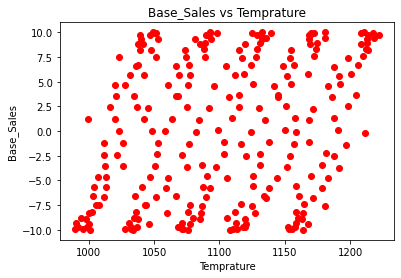

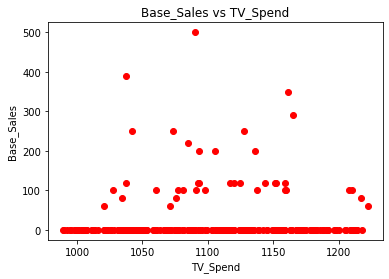

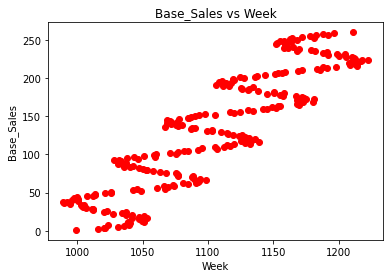

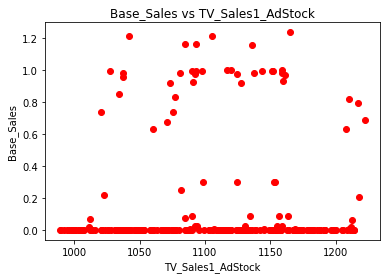

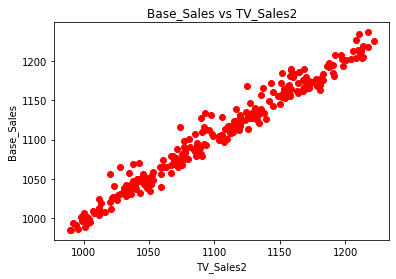

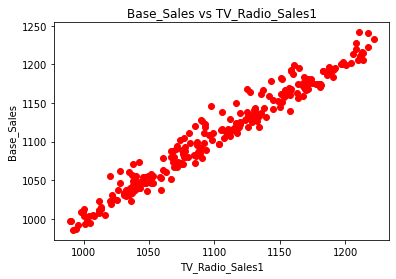

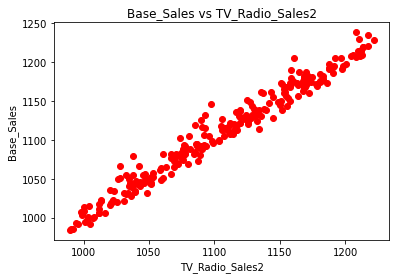

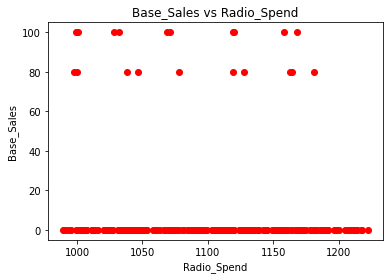

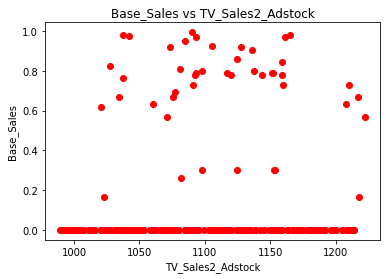

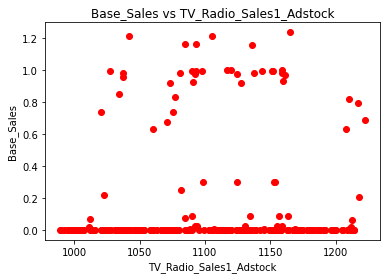

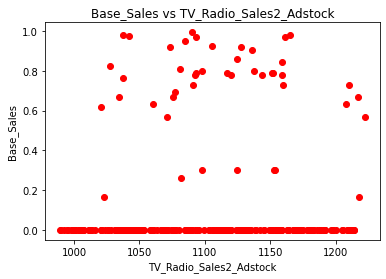

In [0]:
# Scatter graph b/w response and features
for x in features:
    plt.plot(labels, features[x], 'ro')  # arguments are passed to np.histogram
    plt.title("Base_Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("Base_Sales")
    plt.show()

In [0]:
labels = data_clean['Temprature']
features = data_clean.drop(['Temprature'], axis=1)

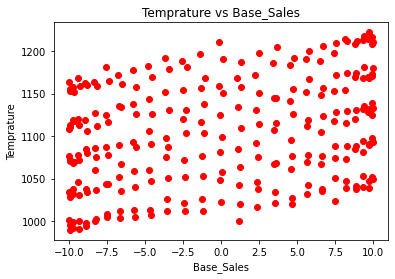

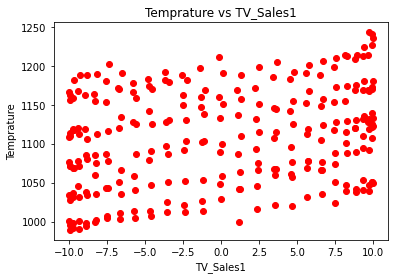

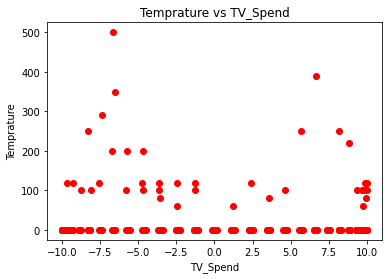

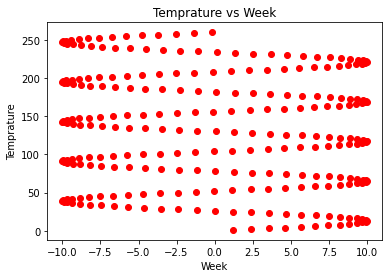

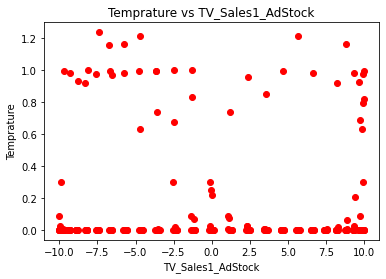

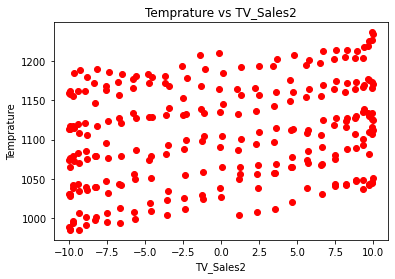

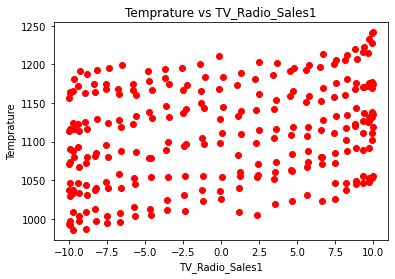

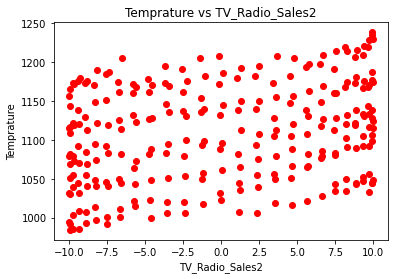

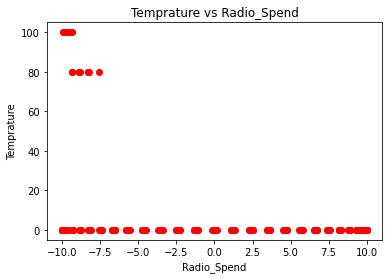

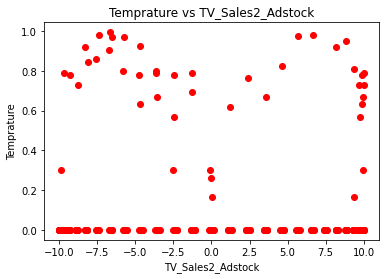

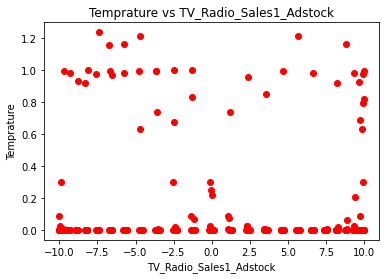

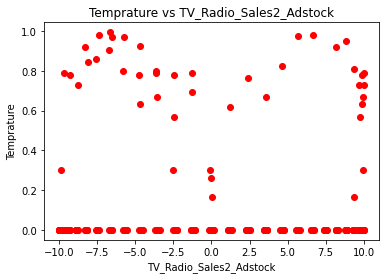

In [0]:
# Scatter graph b/w response and features
for x in features:
    plt.plot(labels, features[x], 'ro')  # arguments are passed to np.histogram
    plt.title("Temprature vs " + x)
    plt.xlabel(x)
    plt.ylabel("Temprature")
    plt.show()

In [0]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="TV_Sales1_AdStock~TV_Sales1", data=data_clean).fit()

#TV_Sales1_AdStock~TV_Sales1
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:      TV_Sales1_AdStock   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     13.38
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           0.000308
Time:                        09:31:58   Log-Likelihood:                -80.722
No. Observations:                 260   AIC:                             165.4
Df Residuals:                     258   BIC:                             172.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1705      0.361     -3.240      0.0

In [0]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="TV_Sales2_Adstock~TV_Sales2", data=data_clean).fit()

#TV_Sales1_AdStock~TV_Sales1
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      TV_Sales2_Adstock   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     9.960
Date:                Sat, 13 Jun 2020   Prob (F-statistic):            0.00179
Time:                        11:09:38   Log-Likelihood:                -38.726
No. Observations:                 260   AIC:                             81.45
Df Residuals:                     258   BIC:                             88.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8404      0.306     -2.747      0.0

In [0]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="Base_Sales~TV_Sales1+TV_Sales2+TV_Radio_Sales1+TV_Radio_Sales2", data=data_clean).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:             Base_Sales   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2718.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          1.03e-207
Time:                        11:12:49   Log-Likelihood:                -949.64
No. Observations:                 260   AIC:                             1909.
Df Residuals:                     255   BIC:                             1927.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.1759     10.300     